# Welch Window

$$
w[n] = 1 - \bigg(\frac{k - \frac{N-1-\mathrm{1}_{symmetric}}{2}}{\frac{N+1-\mathrm{1}_{symmetric}}{2}}\bigg)^2
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as dsp
import scipy.fftpack as fft
import IPython.display as display
from zplot import zplot
from compare import compare

In [2]:
def welch(N, sym=False):
    """
    Return a Lanczos window.

    Args:
        N: Number of points in the output window. 
        If zero or less, an empty array is returned.
        sym: When True (default), generates a symmetric window, 
        for use in filter design. When False, generates a 
        periodic window, for use in spectral analysis.

    Returns:
        the Lanczos window of length N with given symmetry

    """
    n = np.arange(N)
    return 1 - ((n - (N - 1 - sym) / 2) / ((N + 1 - sym) / 2))**2

In [3]:
list(welch(7, False))

[0.4375, 0.75, 0.9375, 1.0, 0.9375, 0.75, 0.4375]

In [4]:
list(welch(8, False))

[0.3950617283950617,
 0.691358024691358,
 0.8888888888888888,
 0.9876543209876543,
 0.9876543209876543,
 0.8888888888888888,
 0.691358024691358,
 0.3950617283950617]

In [5]:
list(welch(7, True))

[0.4897959183673469,
 0.8163265306122449,
 0.9795918367346939,
 0.9795918367346939,
 0.8163265306122449,
 0.4897959183673469,
 0.0]

In [6]:
list(welch(8, True))

[0.4375, 0.75, 0.9375, 1.0, 0.9375, 0.75, 0.4375, 0.0]

## Asymmetric

### Odd

In [7]:
test, reference = compare(7, welch, dsp.windows.welch, False)

AttributeError: module 'scipy.signal.windows' has no attribute 'welch'

In [ ]:
_ = dsp.freqz(test, plot=zplot)

In [ ]:
list(test)

In [ ]:
list(reference)

### Even

In [ ]:
test, reference = compare(8, welch, dsp.windows.welch, False)

In [ ]:
_ = dsp.freqz(test, plot=zplot)

In [ ]:
list(test)

In [ ]:
list(reference)

## Symmetric

### Odd

In [ ]:
test, reference = compare(7, welch, dsp.windows.welch, True)

In [ ]:
_ = dsp.freqz(test, plot=zplot)

In [ ]:
list(test)

In [ ]:
list(reference)

### Even

In [ ]:
test, reference = compare(8, welch, dsp.windows.welch, True)

In [ ]:
_ = dsp.freqz(test, plot=zplot)

In [ ]:
list(test)

In [ ]:
list(reference)

## Coherent gain

In [8]:
welch(1024, False).mean()

0.6673170731707317

## Side-lobe amplitude

-21.20678309216284

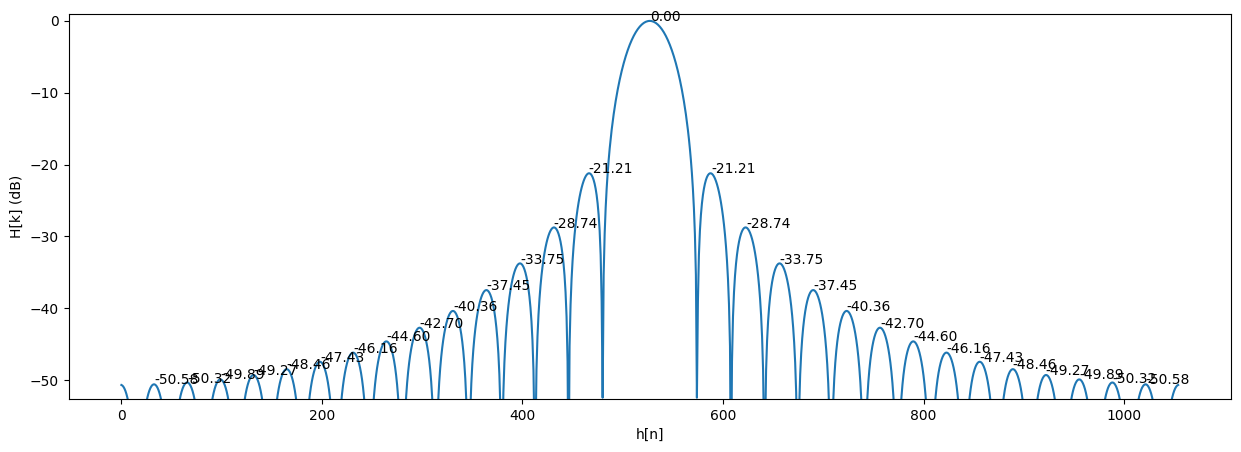

In [9]:
w = welch(31, False)
w = np.pad(w, (512, 512))
H = fft.fft(w)
H = fft.fftshift(H)
H = 20 * np.log10(np.abs(H) + 1e-12)
H = H - H.max()
peaks, _ = dsp.find_peaks(H)
ymin = H[peaks[len(peaks)//2:]][-1] - 1
plt.figure(figsize=(15, 5))
plt.plot(H)
for x, y in zip(peaks, H[peaks]):
    if y > ymin:
        plt.text(x, y, f'{y:.2f}')
plt.ylabel('H[k] (dB)')
plt.xlabel('h[n]')
plt.ylim(ymin - 1, 1)
sorted(H[peaks], reverse=True)[1]